In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string

In [2]:
# Force some columns to be read as strings since the submission requires a 10-digit product id
articles_df = pd.read_csv('./data/articles.csv', dtype={'article_id': 'str', 'product_code': 'str'})
customers_df = pd.read_csv('./data/customers.csv')
transactions_df = pd.read_csv('./data/transactions_train.csv', dtype={'article_id': 'str'})
sample_submission_df = pd.read_csv('./data/sample_submission.csv')

## Articles

In [3]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
articles_df.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

There are 416 missing descriptions and no other missing values which is a good sign.

In [5]:
articles_df.count()

article_id                      105542
product_code                    105542
prod_name                       105542
product_type_no                 105542
product_type_name               105542
product_group_name              105542
graphical_appearance_no         105542
graphical_appearance_name       105542
colour_group_code               105542
colour_group_name               105542
perceived_colour_value_id       105542
perceived_colour_value_name     105542
perceived_colour_master_id      105542
perceived_colour_master_name    105542
department_no                   105542
department_name                 105542
index_code                      105542
index_name                      105542
index_group_no                  105542
index_group_name                105542
section_no                      105542
section_name                    105542
garment_group_no                105542
garment_group_name              105542
detail_desc                     105126
dtype: int64

In [6]:
articles_df.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

All articles in the dataset are unique.

Interestingly product_type_no and product_type_name do not have the same amount of unique values. Section name and section number are also suspicious.
Let's investigate.

In [7]:
x = articles_df.groupby(['department_no', 'department_name']).size().reset_index(name='count').sort_values("department_name")
x[x["department_name"].duplicated(keep=False)]

,department_no,department_name,count
296,9985,Accessories,579
116,3941,Accessories,57
229,7530,Accessories,51
94,3510,Accessories,7
88,3209,Bags,517
...,...,...,...
49,1710,Trouser,322
50,1717,Trouser,470
51,1722,Trouser,917
70,1939,Woven bottoms,379


In [8]:
mapping_counts = articles_df.groupby(['product_type_no', 'product_type_name']).size().reset_index(name='count')

In [9]:
mapping_counts.isna().sum()

product_type_no      0
product_type_name    0
count                0
dtype: int64

In [10]:
mapping_counts.nunique()

product_type_no      132
product_type_name    131
count                 96
dtype: int64

In [11]:
# Find non-unique product_type_names
mapping_counts[mapping_counts["product_type_name"].duplicated(keep=False)]


,product_type_no,product_type_name,count
22,83,Umbrella,26
129,532,Umbrella,3


Product type "Umbrella" corresponds to two different product types.

Let's find which articles have these product types.

In [12]:
umbrellas = articles_df[articles_df["product_type_name"] == "Umbrella"]
umbrellas

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
36,0130035001,0130035,Black Umbrella,532,Umbrella,Items,1010016,Solid,9,Black,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
719,0289597012,0289597,UMBRELLA,83,Umbrella,Accessories,1010016,Solid,50,Other Pink,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
720,0289597015,0289597,UMBRELLA,83,Umbrella,Accessories,1010001,All over pattern,9,Black,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
721,0289597016,0289597,UMBRELLA,83,Umbrella,Accessories,1010001,All over pattern,51,Light Pink,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
722,0289597022,0289597,UMBRELLA,83,Umbrella,Accessories,1010016,Solid,73,Dark Blue,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
1104,0318035003,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010019,Transparent,2,Transparent,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1105,0318035009,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010001,All over pattern,73,Dark Blue,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1106,0318035015,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010019,Transparent,51,Light Pink,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1107,0318035017,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010019,Transparent,9,Black,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1108,0318035018,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010006,Dot,10,White,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."


In [13]:
len(umbrellas)

29

There are 29 articles marked as umbrella across two product type numbers.

### Section name/no

In [14]:
mapping_counts = articles_df.groupby(['section_no', 'section_name']).size().reset_index(name='count').sort_values("section_name")

In [15]:
mapping_counts.isna().sum()

section_no      0
section_name    0
count           0
dtype: int64

In [16]:
# Find non-unique section names
mapping_counts[mapping_counts["section_name"].duplicated(keep=False)]

,section_no,section_name,count
1,4,Ladies Other,3
9,17,Ladies Other,1


In [17]:
ladies_other = articles_df[articles_df["section_name"] == "Ladies Other"]
ladies_other.sort_values("section_no")

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
38956,0659573001,0659573,Campari Top,258,Blouse,Garment Upper body,1010016,Solid,12,Light Beige,...,Test Ladies,A,Ladieswear,1,Ladieswear,4,Ladies Other,1001,Unknown,Short-sleeved top in satin with a lace yoke an...
38957,0659573002,0659573,Campari Top,258,Blouse,Garment Upper body,1010016,Solid,9,Black,...,Test Ladies,A,Ladieswear,1,Ladieswear,4,Ladies Other,1001,Unknown,Short-sleeved top in satin with a lace yoke an...
40058,0663434001,0663434,La Boum Blouse,258,Blouse,Garment Upper body,1010016,Solid,8,Dark Grey,...,Test Ladies,A,Ladieswear,1,Ladieswear,4,Ladies Other,1001,Unknown,Straight-cut blouse in satin crêpe with a smal...
43598,0677760001,0677760,Banana,252,Sweater,Garment Upper body,1010016,Solid,9,Black,...,Jersey inactive from S.6,A,Ladieswear,1,Ladieswear,17,Ladies Other,1005,Jersey Fancy,"Long, cable-knit jumper in a soft cotton blend..."


... 1 sweater and 3 blouse's. They should be in the same section. But no worries we can just ignore the `no' columns.

## Customers

In [18]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [19]:
customers_df.count()

customer_id               1371980
FN                         476930
Active                     464404
club_member_status        1365918
fashion_news_frequency    1355969
age                       1356119
postal_code               1371980
dtype: int64

In [20]:
customers_df.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

We have a couple of problems, namely a lot of missing values.

FN and Active columns seem to be the most egregious ones. However, "FN" column is a boolean telling us whether a user is subscribed to the fashion newsletter. "Active" column tells us whether said customer is active for communication.

https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/discussion/305952

So, we can just impute the value `0' for all missing values in these columns.

The other columns we'll have to investigate further.

In [21]:
customers_df.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          3
age                            84
postal_code                352899
dtype: int64

### Investigating the other columns

In [22]:
customers_df["club_member_status"].value_counts(dropna=False, normalize=True)

club_member_status
ACTIVE        0.927485
PRE-CREATE    0.067756
NaN           0.004418
LEFT CLUB     0.000340
Name: proportion, dtype: float64

In [23]:
customers_df["fashion_news_frequency"].value_counts(dropna=False, normalize=True)

fashion_news_frequency
NONE         0.639740
Regularly    0.347976
NaN          0.011670
Monthly      0.000614
Name: proportion, dtype: float64

Quite a few missing values here, we can do a few things to mediate. Either we fill it in with NONE or we create a new value and assign to these rows.

Filling in NONE will skew our data since that is also an option in here

In [24]:
customers_df["age"].value_counts(dropna=False)

age
21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
97.0        4
93.0        4
96.0        3
94.0        3
Name: count, Length: 85, dtype: int64

c:\Users\risky\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risky\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


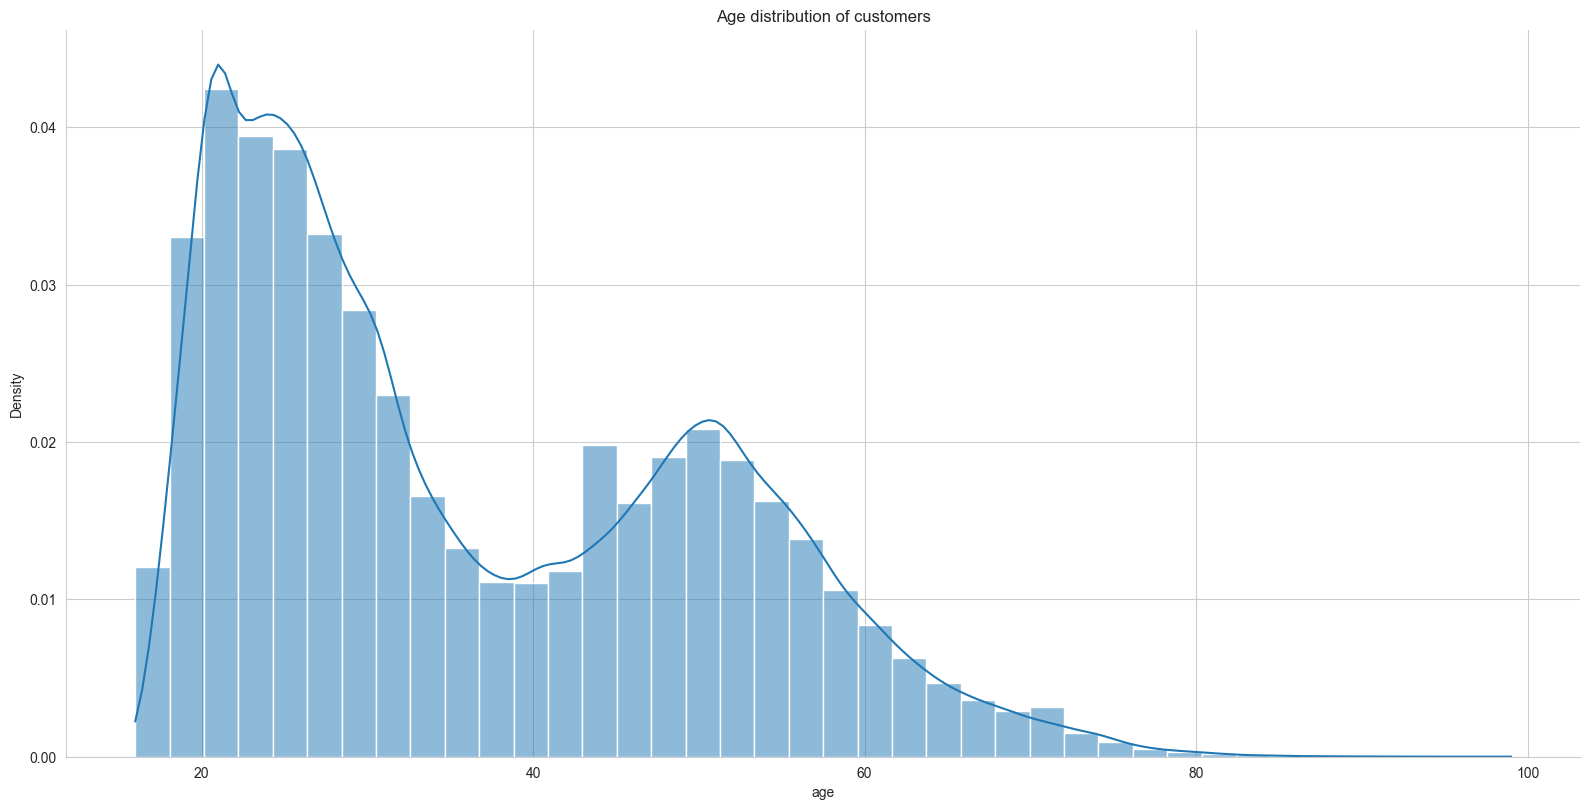

In [25]:
# Age distribution of customers plot
sns.set_style("whitegrid")
sns.displot(customers_df, x="age", kde=True, height=8, aspect=2, stat="density", bins=40).set(title="Age distribution of customers");

c:\Users\risky\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age'>

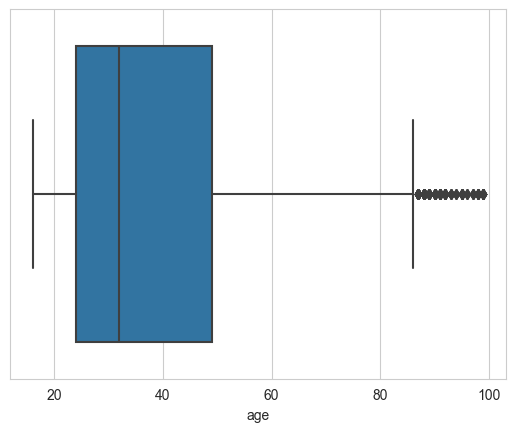

In [26]:
sns.boxplot(x=customers_df["age"])

The age distribution graph looks good. Let's see how many missing values we're dealing with.

In [27]:
print(f"{customers_df['age'].isna().sum() / len(customers_df):.2%} of all customer rows have age missing. \nWe can use the median as value for these rows since we cannot delete them.")

1.16% of all customer rows have age missing. 
We can use the median as value for these rows since we cannot delete them.


In [28]:
# Check if length is 64 and contains hex characters
assert (customers_df["customer_id"].str.len() == 64).all(), "Bad hex format"
assert (customers_df["postal_code"].str.len() == 64).all(), "Bad hex format"
assert (customers_df["customer_id"].apply(lambda x: all(c in string.hexdigits for c in x))).all(), "customer_id column contains non-hexadecimal characters"
assert (customers_df["postal_code"].apply(lambda x: all(c in string.hexdigits for c in x))).all(), "postal_code column contains non-hexadecimal characters"

In [29]:
customers_df["customer_id"].value_counts(dropna=False)

customer_id
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657    1
aaabd1b7c85e6139d6c80addf788b1fde89f52dd71edabfeef699117078ca7d1    1
aaabafd8f1490fb3cb830f363c766568b8c53e8daf938e7262ebc58ac1417a09    1
aaabad72467637cd672a021d2699c2bfb02736cdf53d64e8f3385b623cf9dd1e    1
aaab82bd88837ce6490c66c82954aa1e6d59ca1ae6afcb87a86065cfcf96fb70    1
                                                                   ..
557716a29afd925a80a972134bf6f63fb24943ed1cd33e33850578d429f05189    1
55771330f2fc1075c0a65181ddc963dd0630c61cc51180414195d9f18d4e584b    1
557707059a44632a572fc1cb5676c5f874d27924b28bedfd016c78a36a4b6a40    1
557705fcf5be9236da875c5546485cc96d607dc9fec13506ae3a5182eeb66931    1
ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241    1
Name: count, Length: 1371980, dtype: int64

In [30]:
customers_df["postal_code"].value_counts(dropna=False)

postal_code
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: count, Length: 352899, dtype: int64

`2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c' is suspicious.

## Transactions

In [31]:
# Transactions file too big, lets print the first couple lines from the file
with open('./data/transactions_train.csv') as f:
    for i in range(5):
        print(f.readline())

t_dat,customer_id,article_id,price,sales_channel_id

2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0663713001,0.050830508474576264,2

2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0541518023,0.03049152542372881,2

2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0505221004,0.01523728813559322,2

2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0685687003,0.016932203389830508,2



In [32]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [33]:
transactions_df.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [34]:
# Check if all customers in transactions are in customers_df
transactions_df["customer_id"].isin(customers_df["customer_id"]).all()

True

In [35]:
customers_df["customer_id"].isin(transactions_df["customer_id"]).value_counts(normalize=True)

customer_id
True     0.992931
False    0.007069
Name: proportion, dtype: float64

In [36]:
# Check if all articles in transactions are in articles_df
transactions_df["article_id"].isin(articles_df["article_id"]).all()

True

In [37]:
articles_df["article_id"].isin(transactions_df["article_id"]).value_counts(normalize=True)

article_id
True     0.990572
False    0.009428
Name: proportion, dtype: float64

In [38]:
transactions_df["price"].value_counts()

price
0.016932    3416921
0.033881    3406538
0.025407    3266926
0.013542    1497769
0.050831    1494130
             ...   
0.250780          1
0.106932          1
0.335678          1
0.301949          1
0.250390          1
Name: count, Length: 9857, dtype: int64

In [39]:
transactions_df["t_dat"].value_counts()

t_dat
2019-09-28    198622
2020-04-11    162799
2019-11-29    160875
2018-11-23    142018
2018-09-29    141700
               ...  
2019-01-01     18145
2018-09-22     17635
2018-12-25     14799
2019-12-25     13637
2020-01-01     12760
Name: count, Length: 734, dtype: int64

In [41]:
transactions_instore = transactions_df[transactions_df["sales_channel_id"] == 1]
transactions_online = transactions_df[transactions_df["sales_channel_id"] == 2]

c:\Users\risky\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risky\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


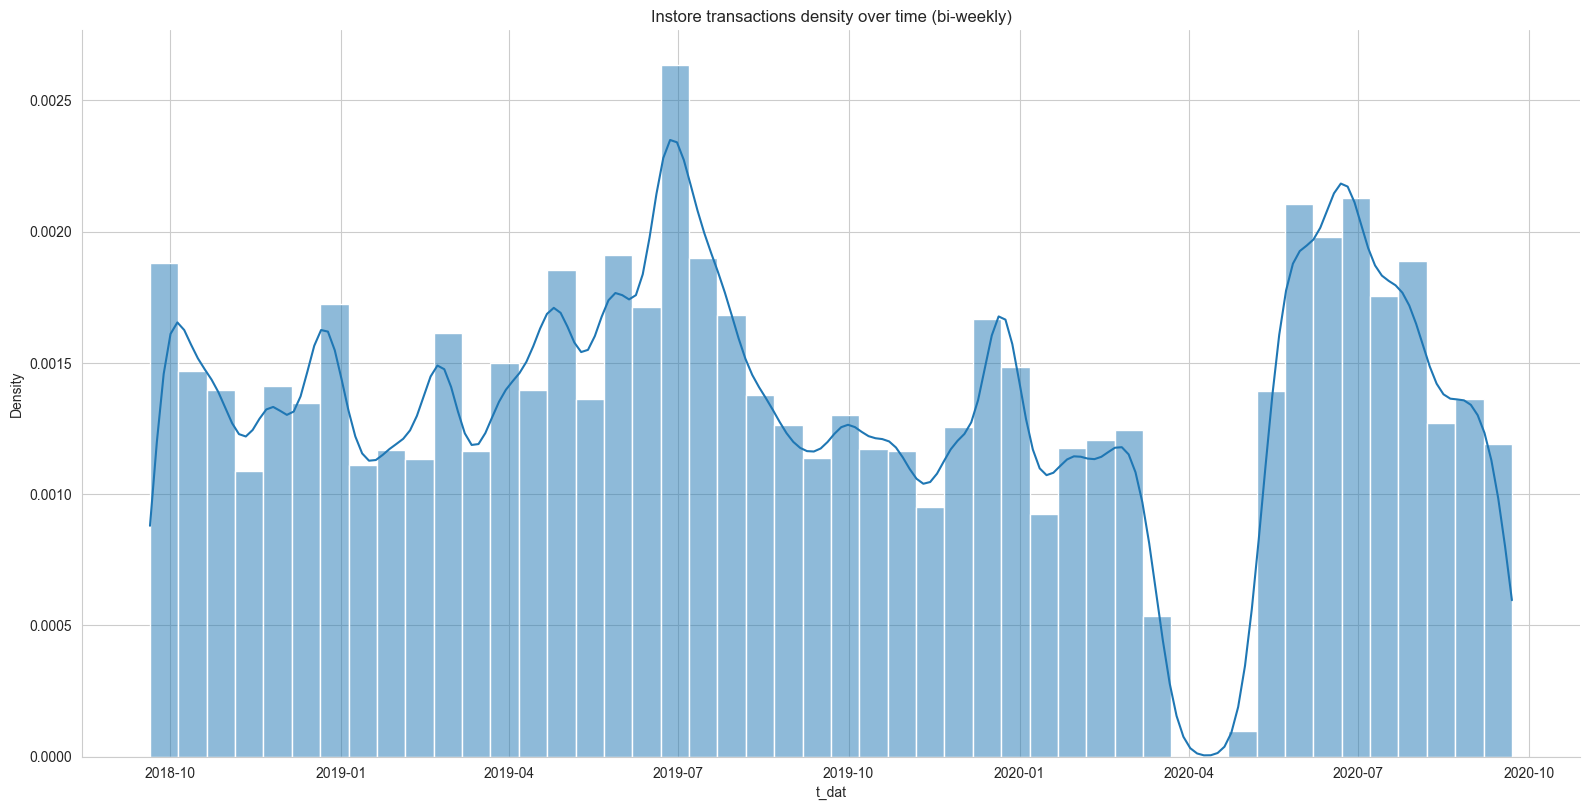

In [42]:
dates = pd.to_datetime(transactions_instore["t_dat"])
sns.displot(dates, height=8, aspect=2, kde=True, stat="density", bins=48).set(title="Instore transactions density over time (bi-weekly)");

c:\Users\risky\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risky\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


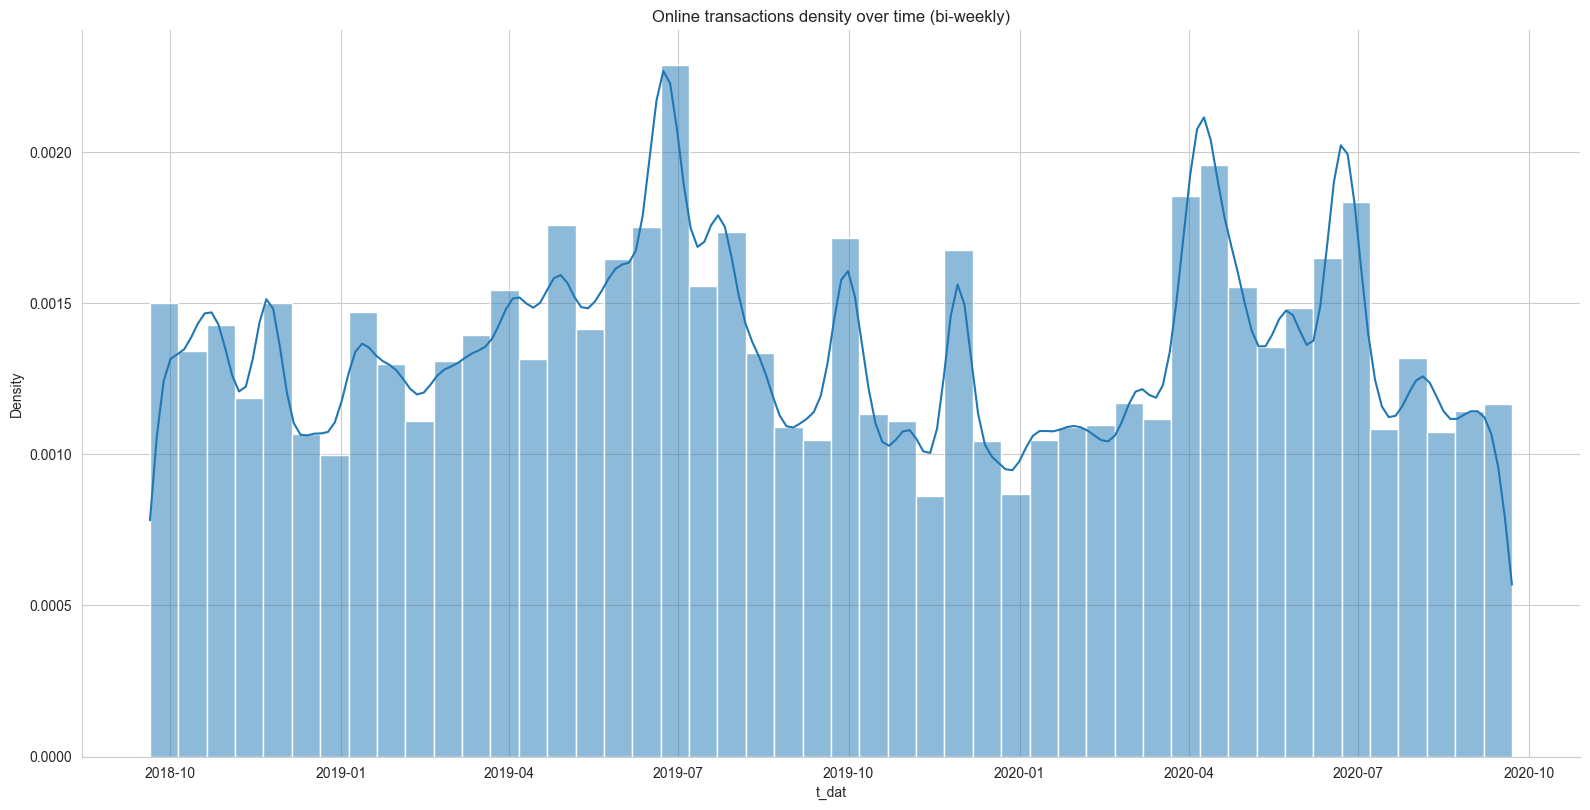

In [43]:
dates = pd.to_datetime(transactions_online["t_dat"])
sns.displot(dates, height=8, aspect=2, kde=True, stat="density", bins=48).set(title="Online transactions density over time (bi-weekly)");

In [45]:
print(transactions_df["t_dat"].min())
print(transactions_df["t_dat"].max())

2018-09-20
2020-09-22


## Submission example

In [46]:
sample_submission_df.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [47]:
sample_submission_df.isna().sum()

customer_id    0
prediction     0
dtype: int64

In [48]:
sample_submission_df.count()

customer_id    1371980
prediction     1371980
dtype: int64

Let's check if all customers are present

In [49]:
assert (sample_submission_df["customer_id"] == customers_df["customer_id"]).all(), "customer_id in sample_submission.csv does not match customer_id in customers.csv"

In [50]:
sample_submission_df.nunique()

customer_id    1371980
prediction           1
dtype: int64

There is only 1 prediction, let's print it.

In [51]:
sample_submission_df["prediction"].value_counts()

prediction
0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001    1371980
Name: count, dtype: int64

In [52]:
prediction = sample_submission_df["prediction"].iloc[0]
for article in prediction.split(" "):
    assert len(article) == 10, "Article id must be 10 digits long"

All good!